In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# import dataframe
df = pd.read_csv("output.csv")

In [19]:
# Drop rows where 'time' is NaN
df = df.dropna(subset=['time'])

In [20]:
# convert time column to date column, trim the time
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# create year, month, combined columns
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

C:\Users\maxim\AppData\Local\Temp\ipykernel_24684\2897033285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
C:\Users\maxim\AppData\Local\Temp\ipykernel_24684\2897033285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['time'].dt.date
C:\Users\maxim\AppData\Local\Temp\ipykernel_24684\2897033285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [22]:
# MEAN SCORE PER YEAR
average_scores_by_year = df.groupby('year')['score'].mean()
print(average_scores_by_year)

year
2006     5.980000
2007     5.101752
2008     6.265667
2009     8.828330
2010    10.098796
2011     9.439328
2012     9.619557
2013    11.381118
2014    11.852980
2015    11.616180
2016    12.561049
2017    13.367622
2018    14.058129
2019    15.638937
2020    14.855543
2021    17.170337
2022    17.296951
2023    17.308916
2024    15.264032
Name: score, dtype: float64


In [23]:
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

      25th Percentile  50th Percentile  75th Percentile  90th Percentile  \
year                                                                       
2006              3.0              4.0             6.75             10.1   
2007              1.0              2.0             6.00             12.0   
2008              1.0              2.0             5.00             16.0   
2009              1.0              2.0             6.00             24.0   
2010              1.0              2.0             4.00             24.0   
2011              1.0              1.0             3.00             12.0   
2012              1.0              1.0             3.00             10.0   
2013              1.0              2.0             3.00             13.0   
2014              1.0              2.0             4.00             15.0   
2015              1.0              2.0             4.00             17.0   
2016              1.0              2.0             3.00             12.0   
2017        

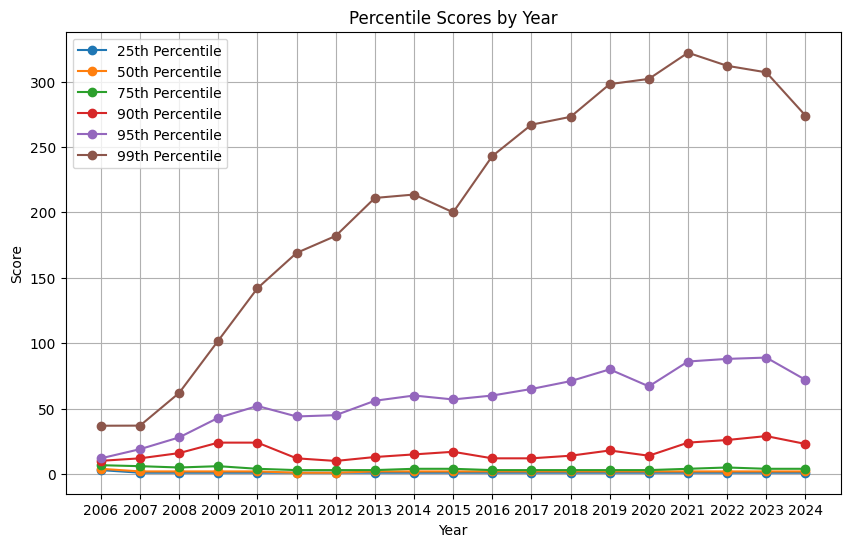

In [26]:
# PERCENTILE SCORES PER YEAR
percentile_scores = df.groupby('year')['score'].apply(lambda x: x.quantile(percentiles)).unstack()
percentile_scores.columns = ['25th Percentile', '50th Percentile', '75th Percentile', '90th Percentile', '95th Percentile', '99th Percentile']
print(percentile_scores)

# VISUALISE PERCENTILE SCORES PER YEAR
plt.figure(figsize=(10, 6))
plt.plot(percentile_scores.index, percentile_scores['25th Percentile'], label='25th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['50th Percentile'], label='50th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['75th Percentile'], label='75th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['90th Percentile'], label='90th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['95th Percentile'], label='95th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['99th Percentile'], label='99th Percentile', marker='o')
plt.title('Percentile Scores by Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.xticks(ticks=percentile_scores.index.astype(int))
plt.legend()
plt.grid(True)
plt.show()

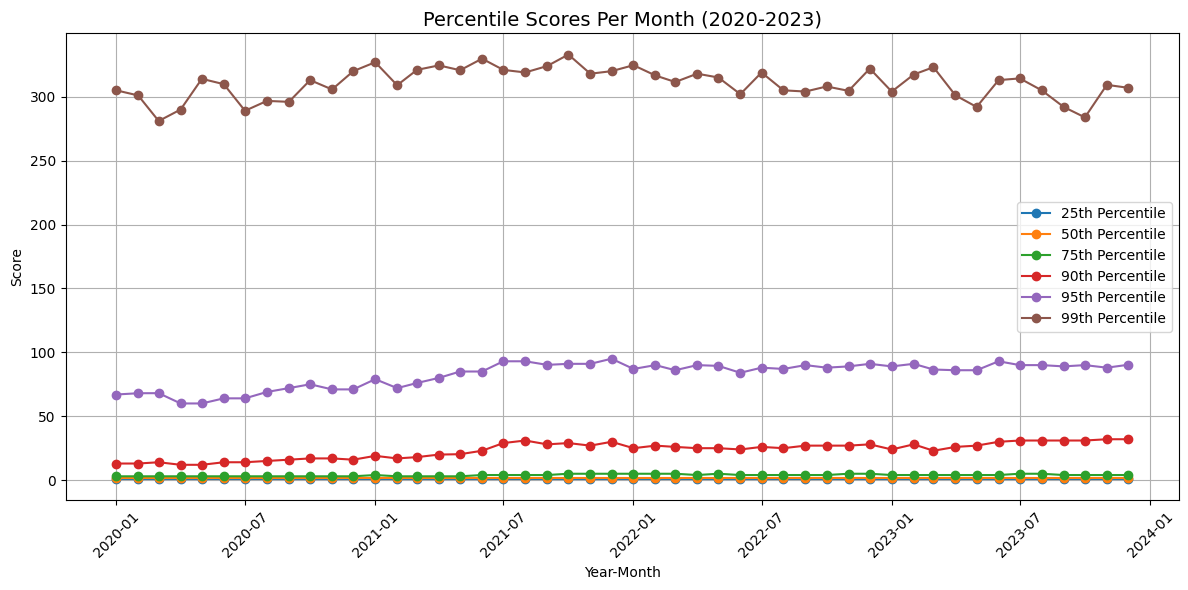

In [27]:
# PERCENTILE SCORES PER MONTH FOR 3 YEARS (SEASONALITY)
df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2023)]
percentile_scores = df_filtered.groupby('year_month')['score'].apply(lambda x: x.quantile(percentiles))
percentile_scores = percentile_scores.reset_index()
percentile_scores.columns = ['year_month', 'percentile', 'score']
percentile_scores = percentile_scores.pivot(index='year_month', columns='percentile', values='score')
percentile_scores.index = pd.to_datetime(percentile_scores.index, format='%Y-%m')
percentile_scores.columns = ['25th Percentile', '50th Percentile', '75th Percentile', '90th Percentile', '95th Percentile', '99th Percentile']

# VISUALISE
plt.figure(figsize=(12, 6))
plt.plot(percentile_scores.index, percentile_scores['25th Percentile'], label='25th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['50th Percentile'], label='50th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['75th Percentile'], label='75th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['90th Percentile'], label='90th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['95th Percentile'], label='95th Percentile', marker='o')
plt.plot(percentile_scores.index, percentile_scores['99th Percentile'], label='99th Percentile', marker='o')
plt.title('Percentile Scores Per Month (2020-2023)', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
